In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [3]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [4]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


Prior 1 - age

In [127]:
model_age = CmdStanModel(stan_file='prior1.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)

17:03:50 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior1.stan to exe file /root/data-analytics/prior1
17:04:12 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior1
17:04:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

17:04:13 - cmdstanpy - INFO - CmdStan done processing.


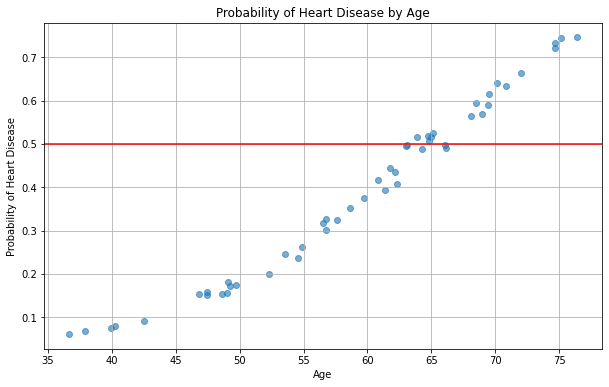

In [128]:
prior1 = sim.draws_pd()

results_df = pd.DataFrame({
    'age': prior1['age'],
    'heart_disease_prob': prior1.iloc[:, 12:].mean(axis=0) # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(prior1['age'], prior1['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.grid(True)
plt.show()

Prior 2 - trestbps (resting blood pressure)

In [170]:
model_age = CmdStanModel(stan_file='prior2.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)

17:48:49 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior2.stan to exe file /root/data-analytics/prior2
17:49:14 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior2
17:49:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

17:49:14 - cmdstanpy - INFO - CmdStan done processing.


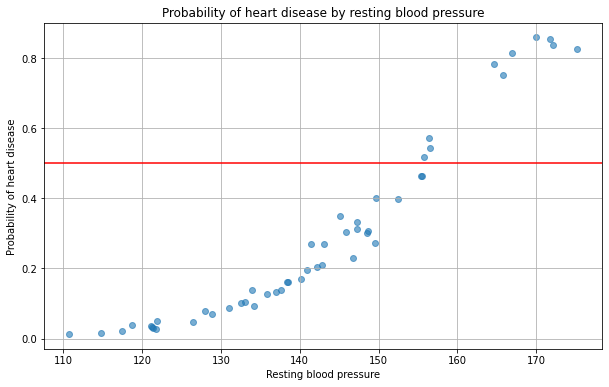

In [171]:
prior2 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior2['bps'], prior2['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Resting blood pressure')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by resting blood pressure')
plt.grid(True)
plt.show()

Prior 3 - thalach (maximum heart rate achieved)

In [164]:


data_prior3 = {
    'N': len(bps),
    'thalach': list(thalach),
}

model_age = CmdStanModel(stan_file='prior3.stan')
sim = model_age.sample(data=data_prior3,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        seed=242522,)

09:10:23 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior3.stan to exe file /root/data-analytics/prior3
09:10:50 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior3
09:10:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:10:50 - cmdstanpy - INFO - CmdStan done processing.


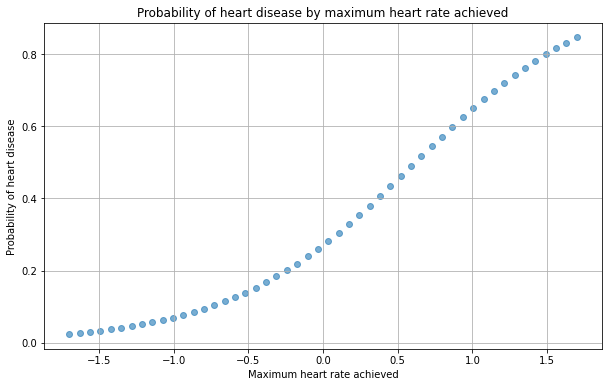

In [165]:
prior3 = sim.draws_pd()

results_df = pd.DataFrame({
    'thalach': data_prior3['thalach'],
    'heart_disease_prob': prior3.iloc[:, 12:].mean(axis=0)  # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['thalach'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by maximum heart rate achieved')
plt.grid(True)
plt.show()

## Posterior

In [12]:
target = data['target']
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [13]:
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(data1)
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [26]:
stan_data = {
    'N': data1.shape[0],
    'K': data1.shape[1],
    'X': data1,
    'y': target.values
}

model = CmdStanModel(stan_file='posterior1.stan')

In [24]:
results

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],alpha
0,1.0,1.0,1.0,-180.003,0.957554,0.078320,5.0,63.0,0.0,181.168,-0.004053,-0.023435,0.037980,-2.220340
1,1.0,2.0,2.0,-182.998,0.994880,0.078320,5.0,31.0,0.0,183.567,0.001418,-0.033466,0.048358,-2.762470
2,1.0,3.0,3.0,-182.327,0.999812,0.078320,6.0,63.0,0.0,185.551,-0.052365,-0.006084,0.024835,0.137938
3,1.0,4.0,4.0,-180.008,0.950218,0.078320,6.0,63.0,0.0,184.044,-0.020366,-0.032013,0.038163,-0.272702
4,1.0,5.0,5.0,-179.387,0.762771,0.078320,3.0,11.0,0.0,181.781,-0.017688,-0.029476,0.037156,-0.422356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4.0,1996.0,7996.0,-181.453,0.999820,0.070155,5.0,31.0,0.0,181.803,-0.047266,-0.004387,0.027421,-0.708321
7996,4.0,1997.0,7997.0,-179.533,0.961025,0.070155,6.0,63.0,0.0,183.997,-0.034545,-0.014298,0.037885,-1.596070
7997,4.0,1998.0,7998.0,-181.400,0.998275,0.070155,5.0,47.0,0.0,185.164,0.000241,-0.032889,0.031119,-0.148705
7998,4.0,1999.0,7999.0,-184.222,0.891450,0.070155,6.0,63.0,0.0,185.989,-0.017585,-0.026076,0.052013,-3.025800


19:01:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:01:52 - cmdstanpy - INFO - CmdStan done processing.



Predicted probability of heart disease: 0.30


/usr/local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


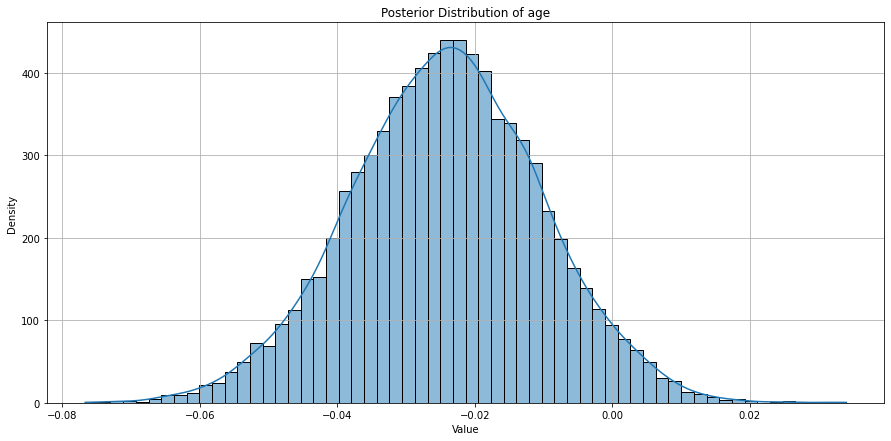

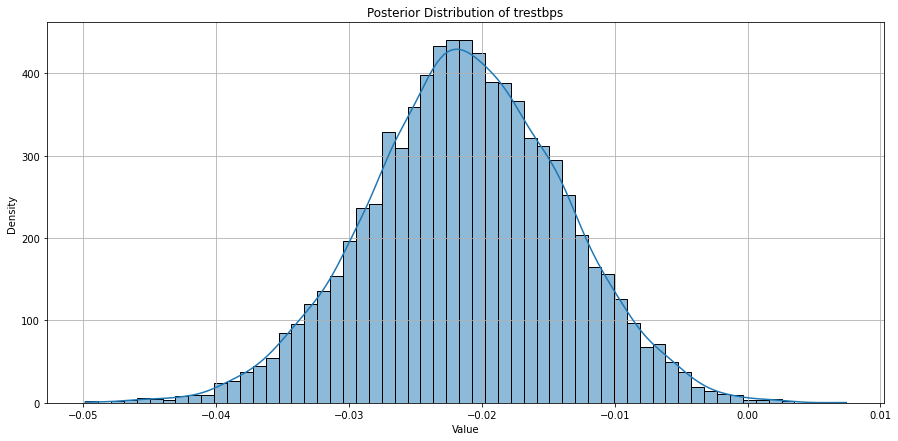

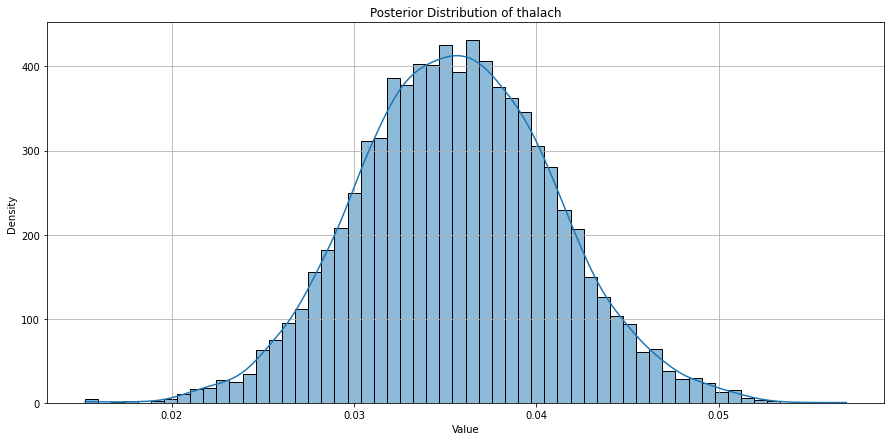

In [27]:
fit = model.sample(data=stan_data, iter_sampling=2000, chains=4)

results = fit.draws_pd()

feature_names = ['age', 'trestbps', 'thalach']
param_names = [f'beta[{i+1}]' for i in range(len(feature_names))]
param_mapping = dict(zip(param_names, feature_names))

beta_columns = [col for col in results.columns if col in param_mapping]

beta_samples = results[beta_columns].values

new_data = np.array([60, 140, 172])  # example new data point
new_data_scaled = scaler.transform([new_data])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Predictive probabilities from posterior samples
pred_probs = sigmoid(np.dot(beta_samples, new_data_scaled.T) + results['alpha'].values[:, np.newaxis])

# Aggregate predictions
predicted_prob = np.mean(pred_probs)
print(f'Predicted probability of heart disease: {predicted_prob:.2f}')

# Plot the posterior distributions in separate figures
for column in beta_columns:
    plt.figure(figsize=(15, 7))
    sns.histplot(results[column], kde=True)
    param_name = param_mapping[column]
    plt.title(f'Posterior Distribution of {param_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [21]:
results

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],alpha
0,1.0,1.0,1.0,-178.946,0.949034,0.072605,5.0,31.0,0.0,182.285,-0.020543,-0.020154,0.031838,-0.685918
1,1.0,2.0,2.0,-180.079,0.949140,0.072605,6.0,63.0,0.0,181.019,-0.006758,-0.027852,0.034728,-1.113920
2,1.0,3.0,3.0,-181.207,0.880350,0.072605,4.0,19.0,0.0,182.866,0.001087,-0.030232,0.034075,-1.147280
3,1.0,4.0,4.0,-181.010,0.933886,0.072605,2.0,3.0,0.0,182.004,0.001004,-0.029342,0.034837,-1.024500
4,1.0,5.0,5.0,-183.267,0.978770,0.072605,6.0,63.0,0.0,185.592,-0.022508,-0.008100,0.035632,-3.027630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4.0,1996.0,7996.0,-179.673,0.995227,0.073472,6.0,63.0,0.0,181.118,-0.005747,-0.031232,0.039640,-1.278340
7996,4.0,1997.0,7997.0,-178.651,0.999779,0.073472,4.0,31.0,0.0,180.355,-0.018649,-0.025632,0.037771,-1.046910
7997,4.0,1998.0,7998.0,-179.085,0.999675,0.073472,6.0,63.0,0.0,179.355,-0.036245,-0.012839,0.032644,-1.001060
7998,4.0,1999.0,7999.0,-179.560,0.974205,0.073472,6.0,63.0,0.0,181.128,-0.017854,-0.014907,0.035440,-2.130670


In [16]:
# Sample from the posterior distribution of the age coefficient
beta_age_samples = results['beta[1]'].values  # Assuming 'beta[1]' corresponds to 'age'

# New data example: age = 60
new_age = 82

# Calculate the linear predictor (log-odds) for each sample
log_odds = beta_age_samples * new_age

# Convert log-odds to probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probabilities = sigmoid(log_odds)

# Aggregate the probabilities
predicted_prob = np.mean(probabilities)
print(f'Predicted probability of heart disease for age 60: {predicted_prob:.2f}')


Predicted probability of heart disease for age 60: 0.17


In [17]:
# Sample from the posterior distribution of the trestbps coefficient
beta_trestbps_samples = results['beta[2]'].values  # Assuming 'beta[2]' corresponds to 'trestbps'

# New data example: trestbps = 140
new_trestbps = 140

# Calculate the linear predictor (log-odds) for each sample
log_odds = beta_trestbps_samples * new_trestbps

# Convert log-odds to probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probabilities = sigmoid(log_odds)

# Aggregate the probabilities
predicted_prob = np.mean(probabilities)
print(f'Predicted probability of heart disease for trestbps 140: {predicted_prob:.2f}')


Predicted probability of heart disease for trestbps 140: 0.07
